# QUESTIONS TO SOLVE WITH THIS ANALYSIS

- Which attributes are the most attributes important for being forward, middle, defender or goalkeeper
- Correlation between age and fisical attributes
- Skill moves and weak foot are important to be a good player?


In [409]:
import pandas as pd
import numpy as np
import re
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kde

%matplotlib inline

# UNDERSTANDING DATAFRAME

In [141]:
df = pd.read_csv('data.csv')

In [142]:
# Let's check the shape of the dataframe
df.shape

(18207, 89)

In [143]:
# Let's take a look into the columns
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [144]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [145]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# FEATURE ENGINEERING

In [146]:
# Let's define which of the columns are useless for a general analysis using simple logic
useless_columns = [
    'Unnamed: 0', # it's just the csv index
    'ID', # the ID of the player doesn't tell us anything
    'Photo', # The way a player play or how much he earn should be based on his appearance
    'Flag', # The flag is just the graphical representation of the country
    'Jersey Number', # The number of the jersey many times does not represents anything
    'Club Logo', # It's just the graphical representation of the club
    'Special', # Don't know what does this number represent
    'Real Face', # The way a player play or how much he earn should be based on his appearance
    'Body Type' # The body type is just the way that is representated in the FIFA (but there are justy 2 types)
]

In [147]:
df = df.drop(columns=useless_columns, axis=0)

In [148]:
# Finding emtpy columns
empty_columns = []
for col in df.columns:
    empty_rate = np.sum(df[col].isnull())/df.shape[0]
    if empty_rate > .5:
        print(col, empty_rate)
        empty_columns.append(col)

Loaned From 0.9305761520294392


In [149]:
df = df.drop(columns=empty_columns, axis=0)

In [150]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


## Pricing fields

In [151]:
pricing_columns = ['Value', 'Wage', 'Release Clause']
pricing_chars = set()
for index, row in df[pricing_columns].iterrows():
    for col in pricing_columns:
        if isinstance(row[col], str):
            pricing_chars |= set(re.findall(r'\D\D*', row[col]))
print("Chars used in pricing fields:", pricing_chars)

Chars used in pricing fields: {'.', '€', 'M', 'K'}


In [152]:
# Let's define a function to parse the pricing values str to float
def price_to_float(price_str):
    if not pd.isnull(price_str):
        char_value = {
            'M': 1000000,
            'K': 1000
        }
        price = price_str.replace('€', '')
        char_found_search = re.search(r'K|M', price)
        if char_found_search:
            char_found = char_found_search.group(0)
            return float(price.replace(char_found, '')) * char_value.get(char_found)
        return price
    else:
        return price_str


In [153]:
for col in pricing_columns:
    df[col] = df[col].apply(price_to_float)

## Classification fields

In [154]:
df['Preferred Foot'] = df['Preferred Foot'].map({'Left': 0, 'Right': 1})

In [155]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

## Parsing strings to float

In [156]:
df['Height'] = [float(h.replace("'", ".")) if isinstance(h, str) else h for h in  df['Height']]

In [157]:
df['Weight'] = [float(w.replace("lbs", "")) if isinstance(w, str) else w for w in  df['Weight']]

In [158]:
position_columns = ['LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']    
for col in position_columns:
    df[col] = df[col].map(lambda x: literal_eval(x) if not pd.isnull(x) else x)

In [174]:
forward_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
middle_columns = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']
defender_columns = ['RWB', 'LWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
def get_postions_stats(df):
    columns_list = []
    for index, row in df.iterrows():
        columns = {}
        if pd.isnull(row['LS']):
            columns = {
                'avg_forward': 0, 
                'max_forward': 0, 
                'min_forward': 0,
                'avg_middle': 0,
                'max_middle': 0,
                'min_middle': 0,
                'avg_defender': 0,
                'max_defender': 0,
                'min_defender': 0,
                'possible_position': 'goalkeeper'
            }
        else:
            columns['avg_forward'] = row[forward_columns].mean()
            columns['max_forward'] = row[forward_columns].max()
            columns['min_forward'] = row[forward_columns].min()
            columns['avg_middle'] = row[middle_columns].mean()
            columns['max_middle'] = row[middle_columns].max()
            columns['min_middle'] = row[middle_columns].min()
            columns['avg_defender'] = row[defender_columns].mean()
            columns['max_defender'] = row[defender_columns].max()
            columns['min_defender'] = row[defender_columns].min()
            
            max_grade = columns['avg_defender']
            position = 'defender' # Most common position
            if columns['avg_middle'] > max_grade:
                max_grade = columns['avg_middle']
                position = 'middle'
            if columns['avg_forward'] > max_grade:
                position = 'forward'
            columns['possible_position'] = position
        columns_list.append(columns)
    return pd.concat([df, pd.DataFrame(columns_list)], axis=1)

In [163]:
df = get_postions_stats(df)

In [611]:
best_players = df[df.Overall > 80]
print("{} Best players".format(best_players.shape[0]))

412 Best players


In [612]:
avg_players = df[(df.Overall > 65) & (df.Overall < 80)]
print("{} avg players".format(avg_players.shape[0]))

9372 avg players


In [613]:
poor_players = df[df.Overall < 65]
print("{} poor players".format(poor_players.shape[0]))

7235 poor players


# Relation attrs - position

In [675]:
attrs = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

def show_attributes(df):
    data = df[attrs + ['possible_position']].groupby('possible_position').mean()
    sns.set(font_scale=2)
    plt.figure(figsize=(30,10))
    sns.heatmap(data, annot=True, cbar=False, cmap="Blues")

## Best players

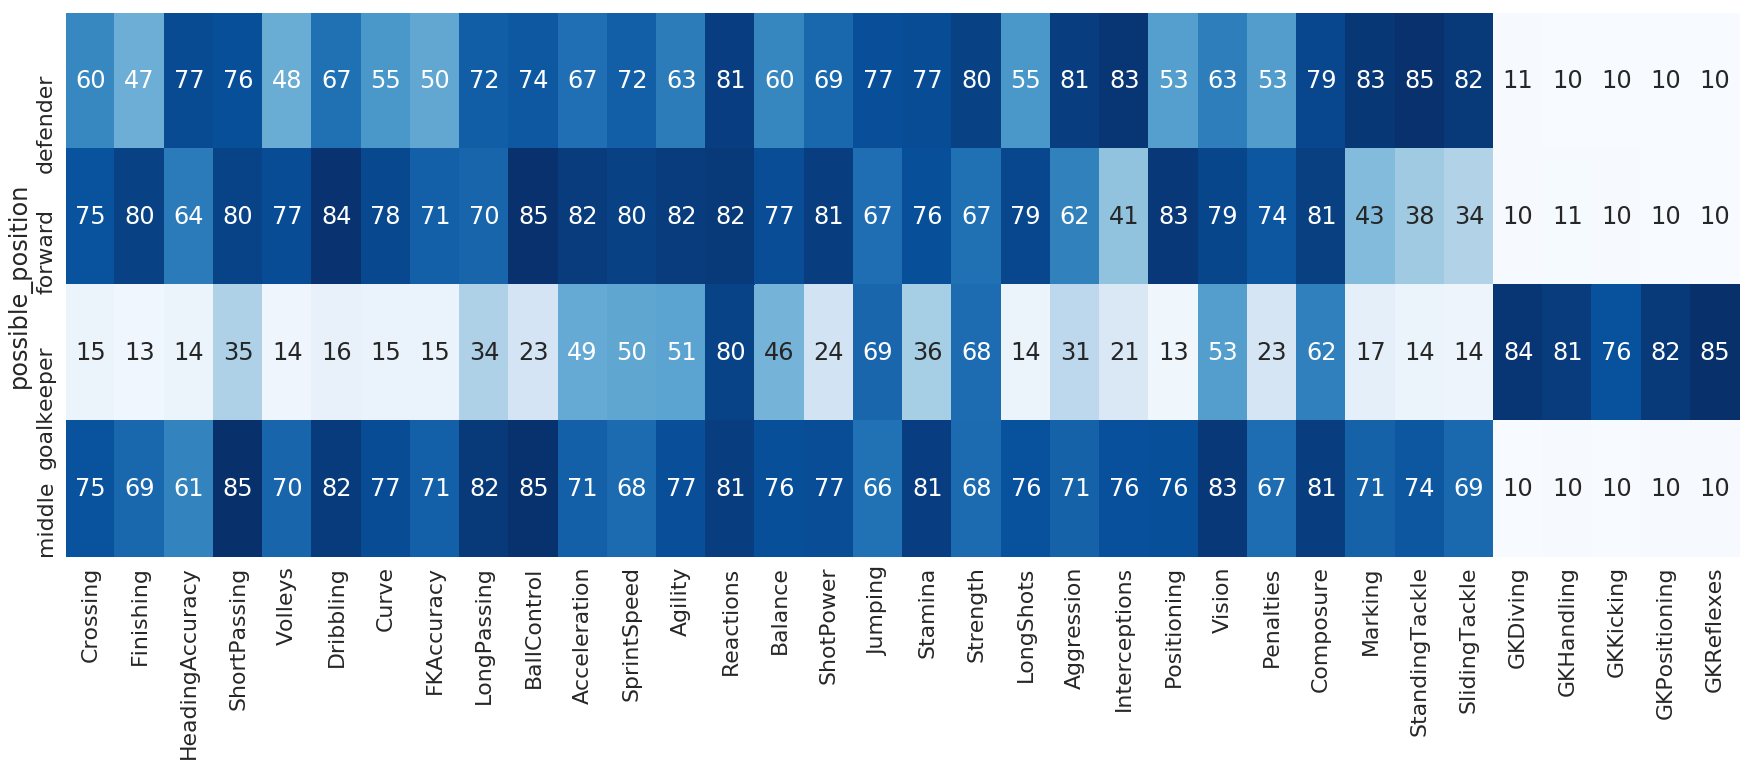

In [674]:
show_attributes(best_players)

## AVG players

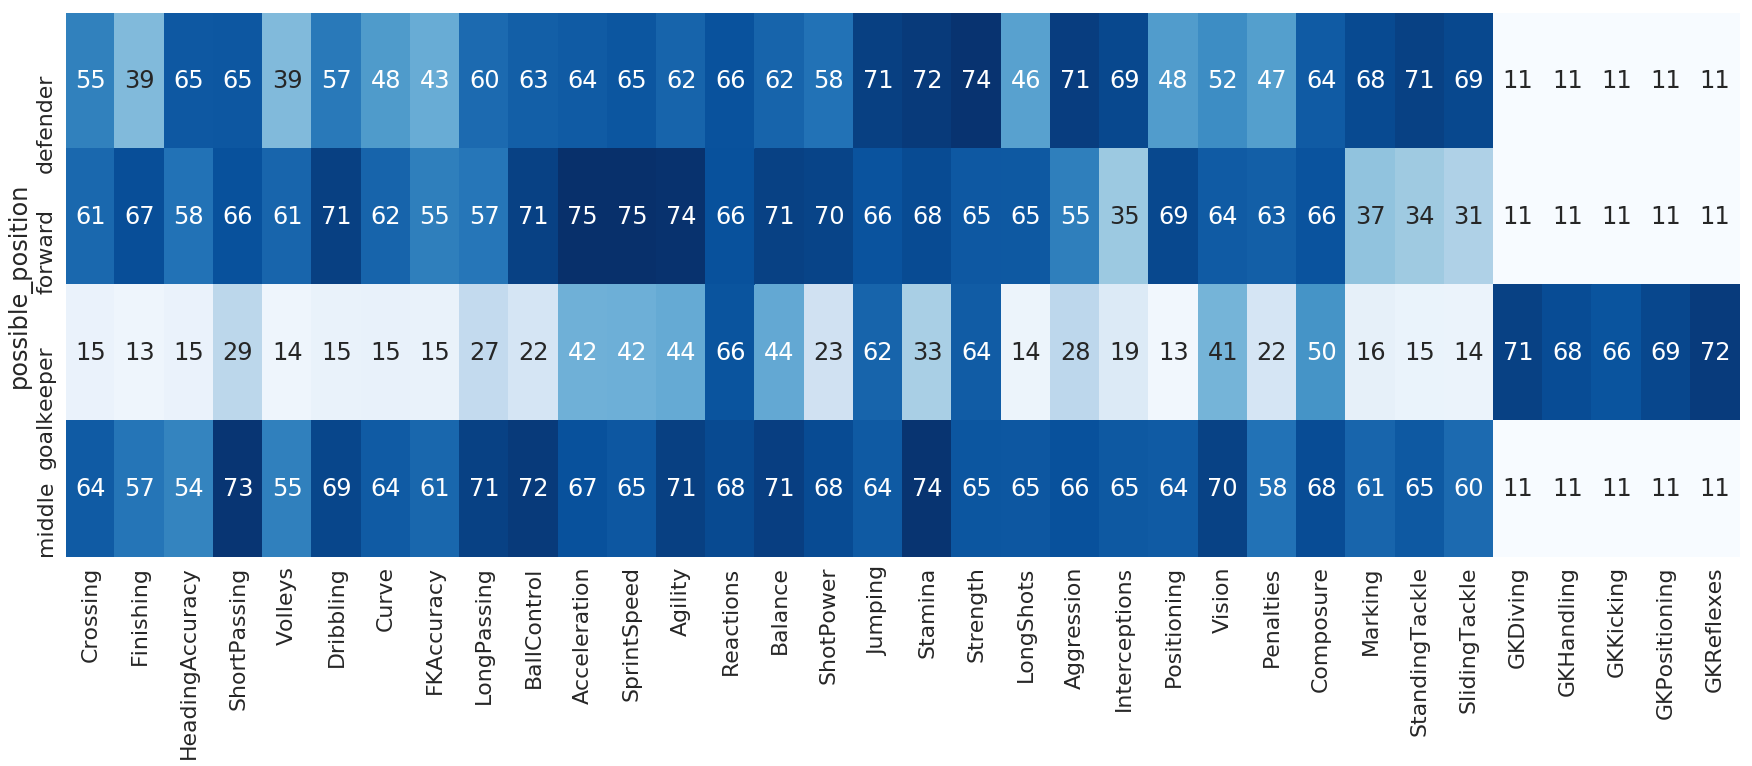

In [661]:
show_attributes(avg_players)

## Poor players

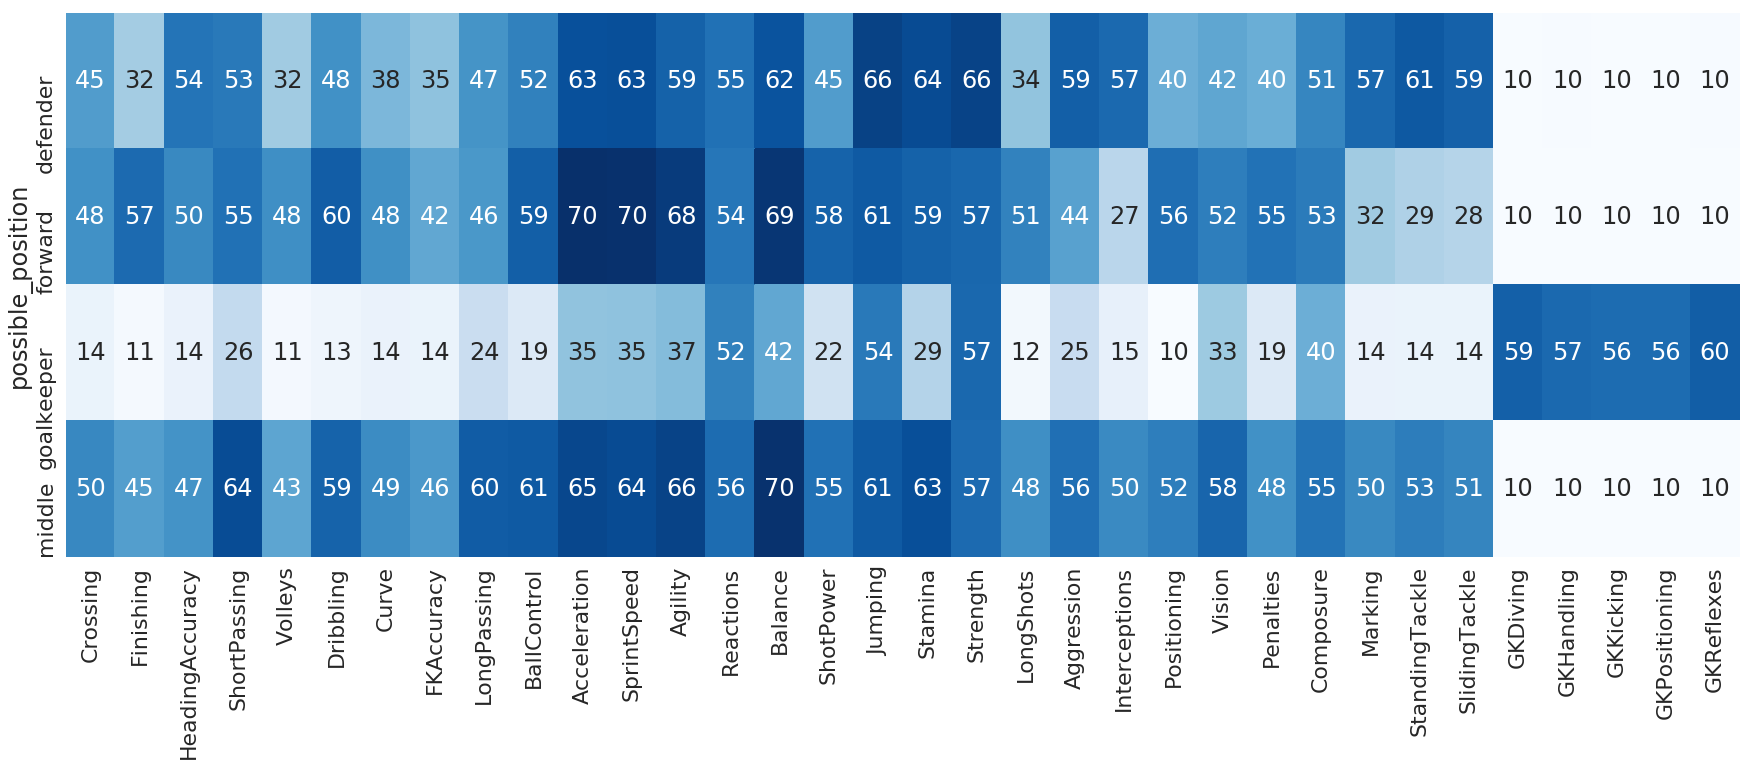

In [662]:
show_attributes(poor_players)

# HEIGHTS & WEIGHTS

In [677]:
sns.set()

height_bins = [5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8]

weight_bins = [120, 140, 160, 180, 200, 220, 240]

def show_heights_weights(df):
    for position in df.possible_position.unique(): 
        fig, axs = plt.subplots(ncols=2, figsize=(15,5))
        fig.text(0.06, 0.5, 'Number of ' + position + ' players', ha='center', va='center', rotation='vertical')

        _ = axs[0].hist(df.dropna(subset=['Height'], axis=0)[df.possible_position==position]['Height'], bins=height_bins)
        axs[0].set_title('Height')

        _ = axs[1].hist(df.dropna(subset=['Weight'], axis=0)[df.possible_position==position]['Weight'], bins=weight_bins)
        axs[1].set_title('Weight')

        plt.show()



## Best players

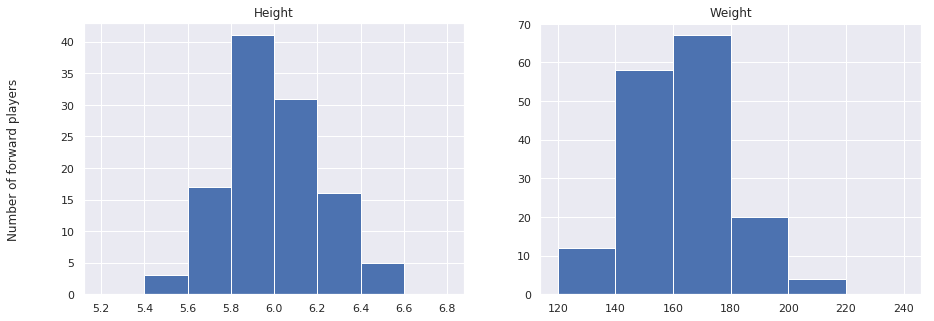

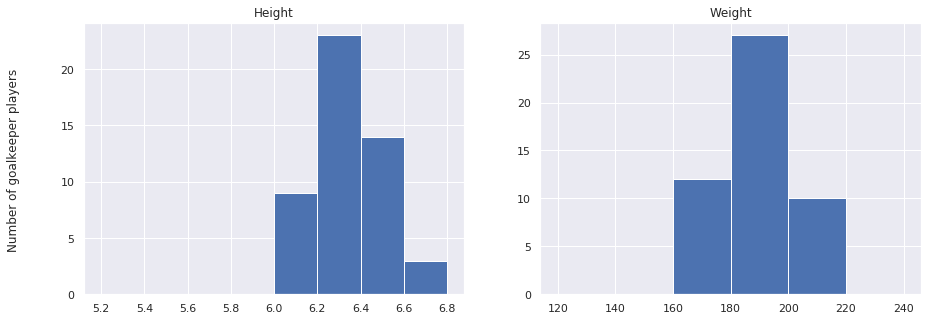

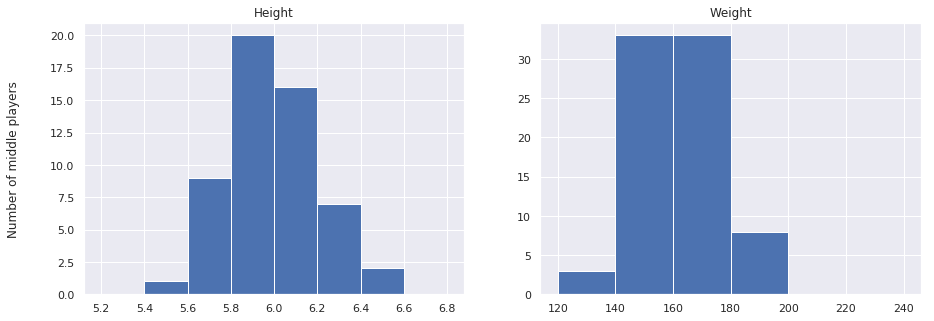

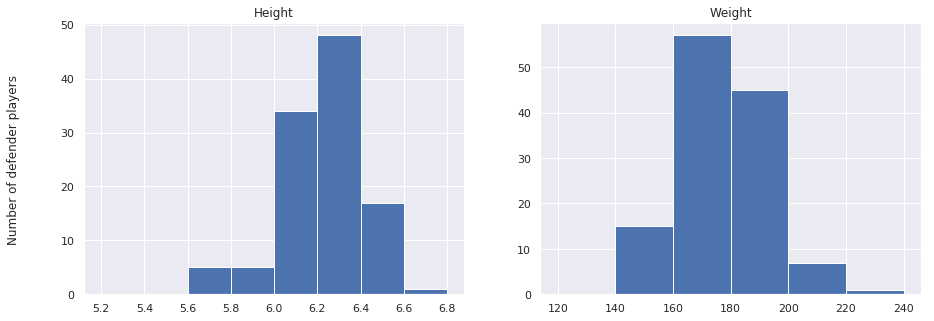

In [678]:
show_heights_weights(best_players)

### AVG players

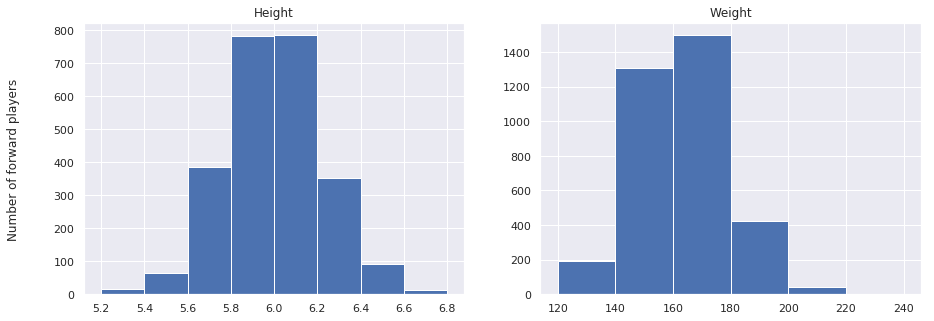

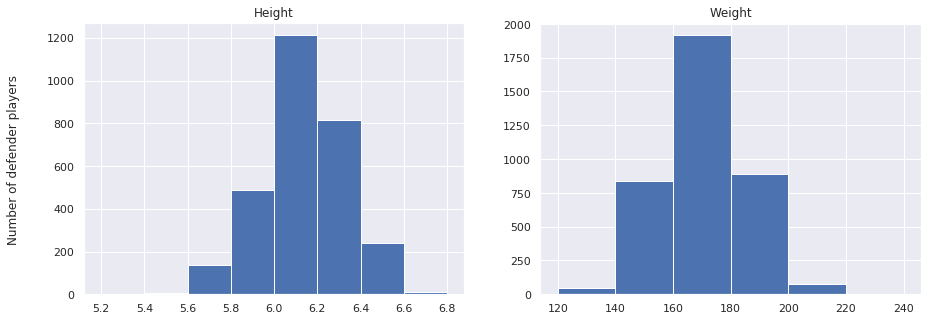

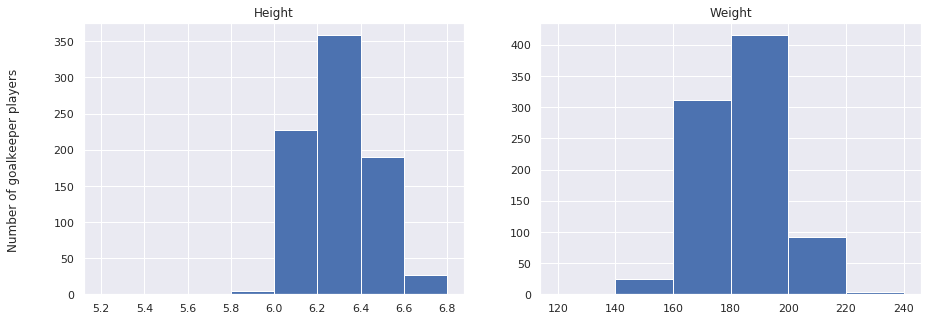

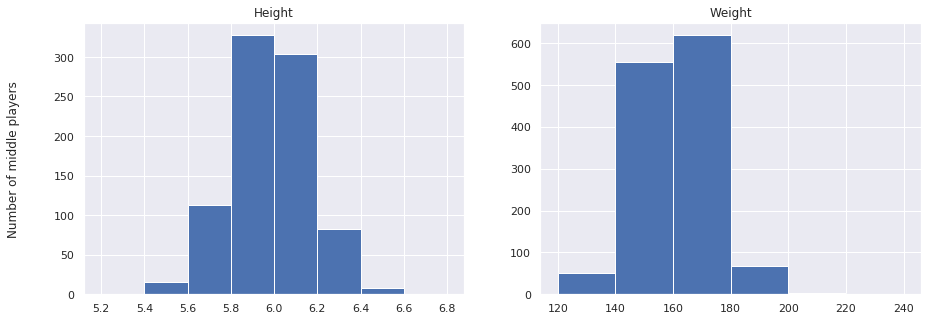

In [679]:
show_heights_weights(avg_players)

## Poor players

/home/kevin/Desktop/fifa-players-analysis/env/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/kevin/Desktop/fifa-players-analysis/env/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


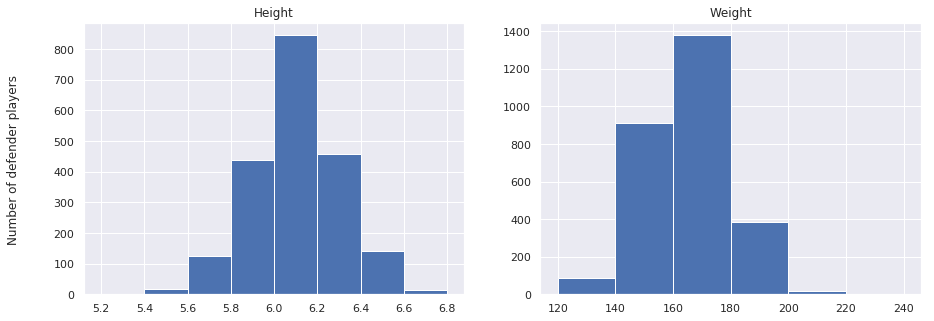

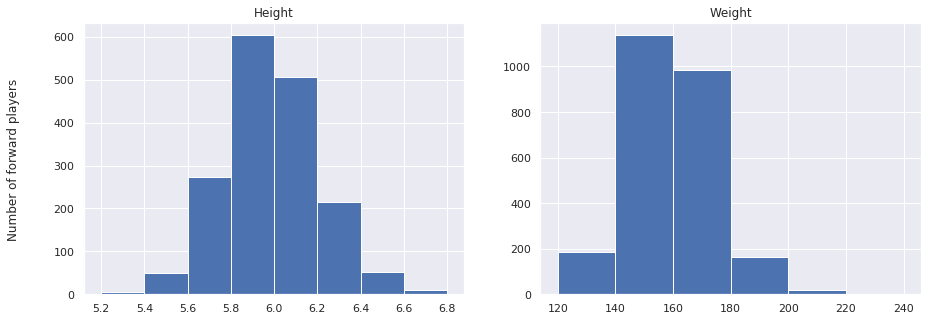

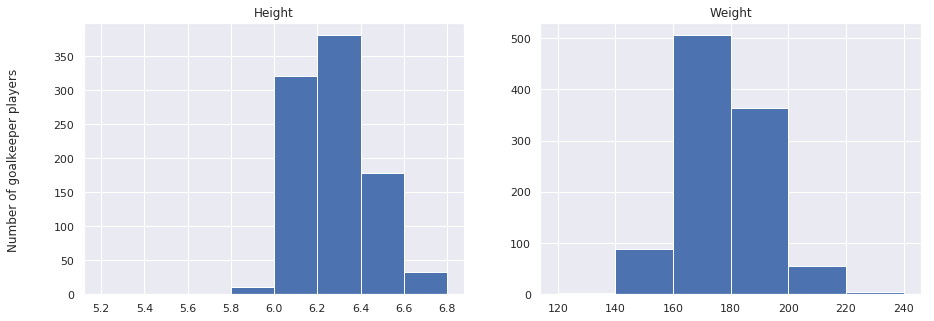

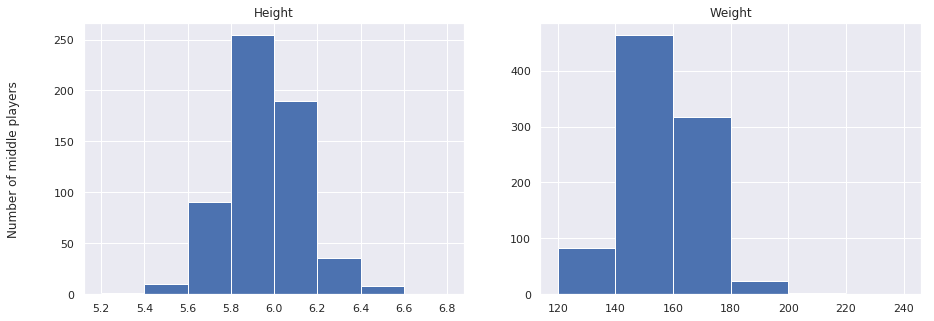

In [680]:
show_heights_weights(poor_players)

# Weak Foot

In [639]:
def show_week_foot(df):
    for position, df_position in df.groupby('possible_position'):
        try:
            x = df_position['Overall']
            y = df_position['Weak Foot']
            nbins=40
            k = kde.gaussian_kde([x,y])
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))

            plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)

            plt.title('{} {}s'.format(df.shape[0], position))
            plt.ylabel('Weak Foot')
            plt.xlabel('Overall')
            plt.colorbar()
            plt.show()
        except:
            print("AVG Weak Foot for " + position + ": " + str(df_position['Weak Foot'].mean()))

## Best players

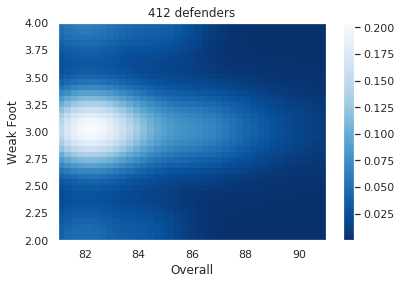

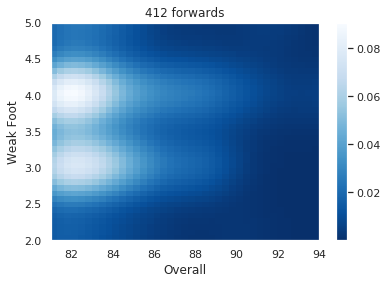

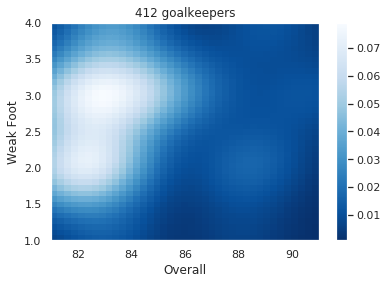

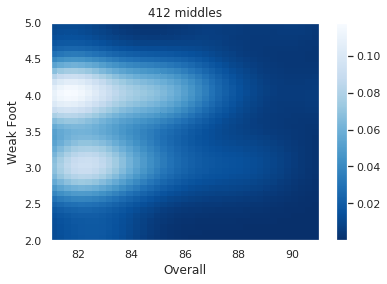

In [640]:
show_week_foot(best_players)

### AVG players

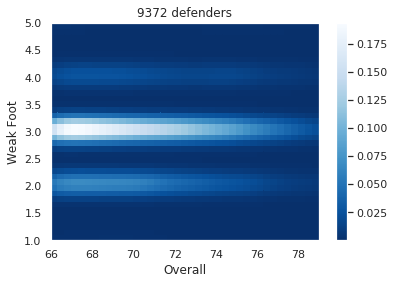

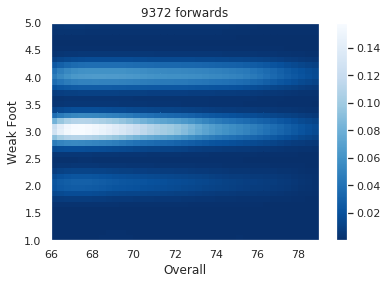

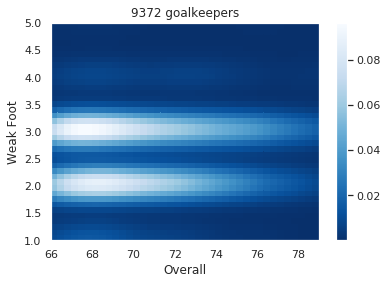

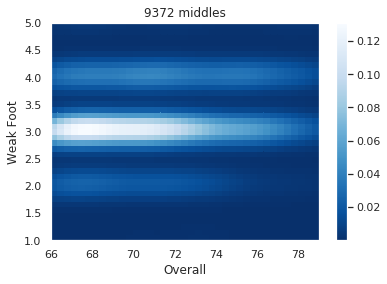

In [641]:
show_week_foot(avg_players)

### Poor players

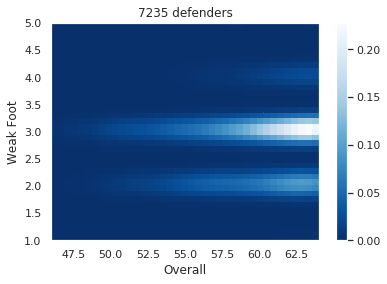

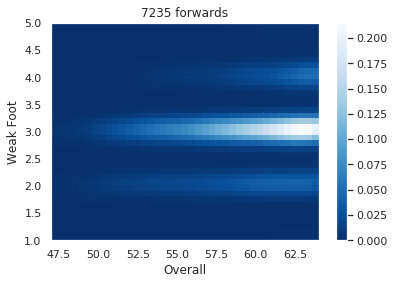

AVG Weak Foot for goalkeeper: 2.450980392156863


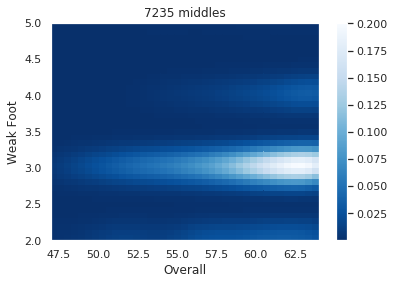

In [642]:
show_week_foot(poor_players)

# Skill moves

### Best players

In [647]:
def shpw_skill_moves(df):
    df = df.dropna(subset=['Skill Moves', 'Overall'])
    for position, df_position in df.groupby('possible_position'):
        try:
            x = df_position['Overall']
            y = df_position['Skill Moves']
            nbins=40
            k = kde.gaussian_kde([x,y])
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))

            plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)

            plt.title('{} {}s'.format(df_position.shape[0], position))
            plt.ylabel('Skill Moves')
            plt.xlabel('Overall')
            plt.show()
        except:
            print("AVG Skill Moves for " + position + ": " + str(df_position['Skill Moves'].mean()))

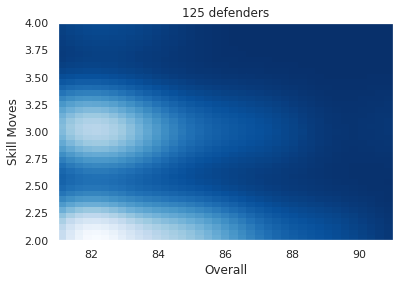

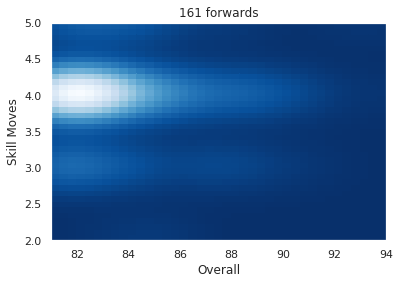

AVG Skill Moves for goalkeeper: 1.0


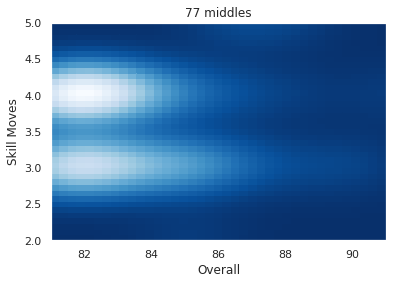

In [648]:
print_skill_moves(best_players)

### AVG players

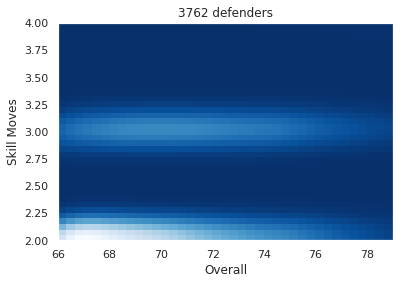

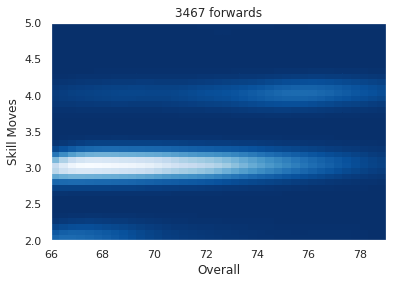

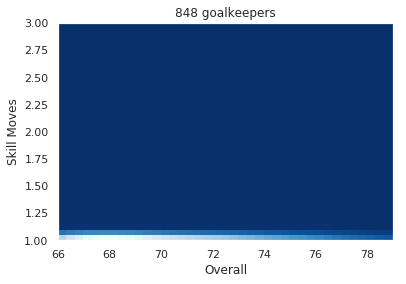

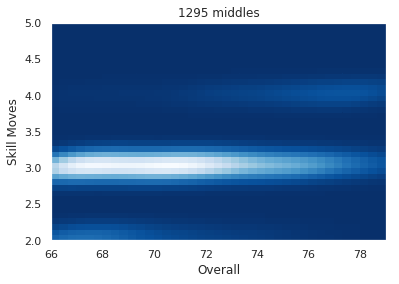

In [649]:
print_skill_moves(avg_players)

### Poor players

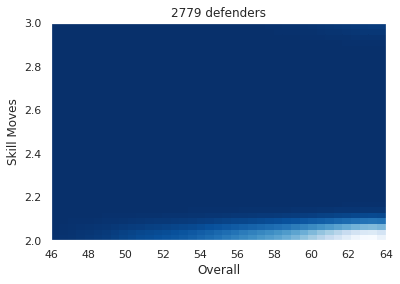

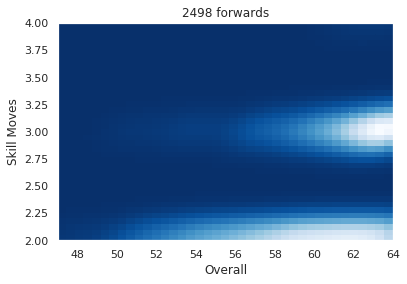

AVG Skill Moves for goalkeeper: 1.0058823529411764


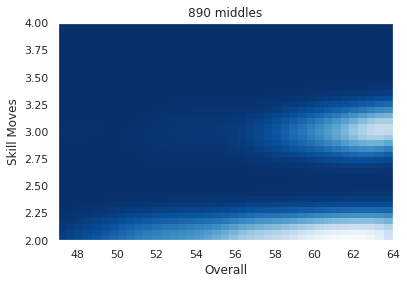

In [651]:
print_skill_moves(poor_players)

# Age

In [653]:
def show_age(df):
    df = df.dropna(subset=['Age', 'Overall'])
    for position, df_position in df.groupby('possible_position'):
        try:
            x = df_position['Age']
            y = df_position['Overall']
            nbins=30
            k = kde.gaussian_kde([x,y])
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))

            plt.xlim(x.min(), x.max())  
            plt.ylim(y.min(), y.max())  

            plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)

            plt.title('{} {}s'.format(df_position.shape[0], position))
            plt.xlabel('Age')
            plt.ylabel('Overall')

            plt.show()
        except:
            print("AVG Age for " + position + ": " + str(df_position['Skill Moves'].mean()))

### Best players

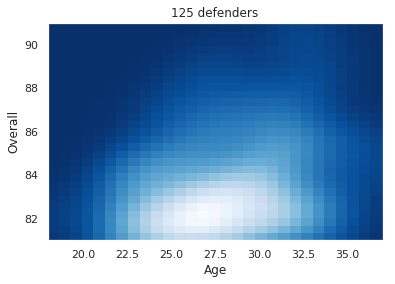

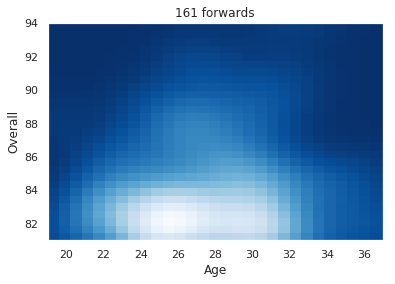

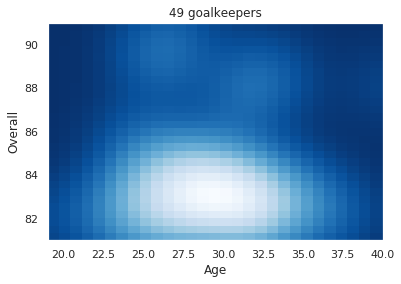

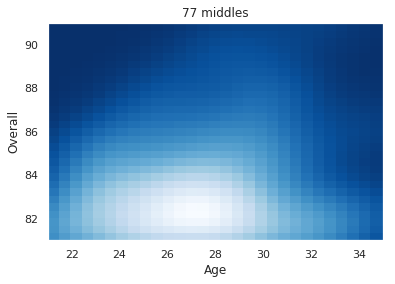

In [654]:
show_age(best_players)

### AVG players

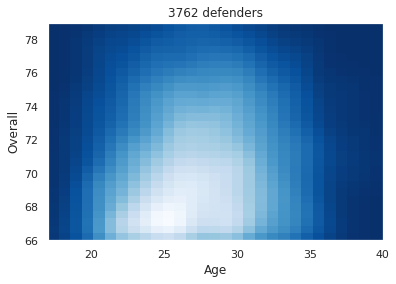

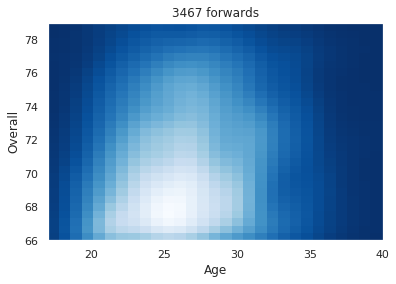

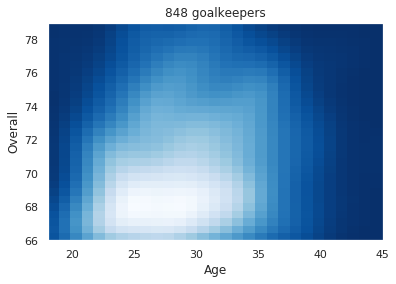

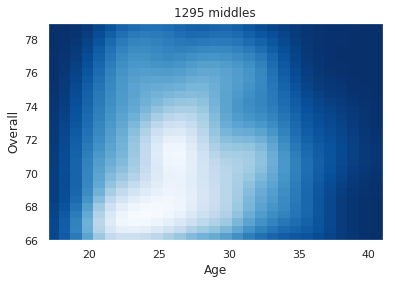

In [655]:
show_age(avg_players)

### Poor players

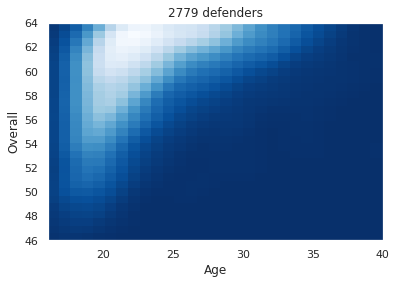

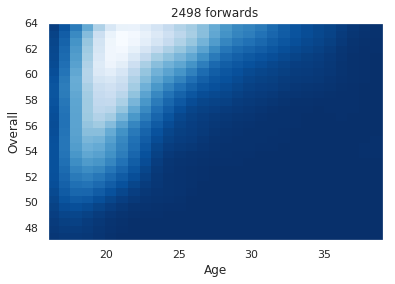

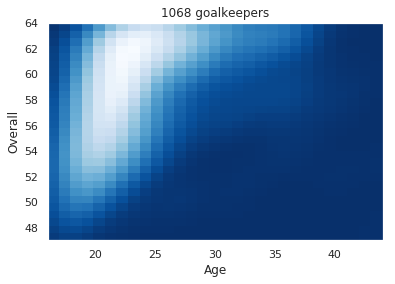

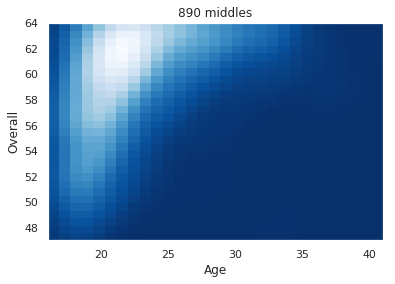

In [656]:
show_age(poor_players)